In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3  # ou outro banco local
import os

Caminho para a pasta onde est√£o os arquivos CSV

In [2]:
caminho = r"C:\Users\rafae\Documents\Python\Jupyter\Triggo\arquivos"

In [3]:
clientes = pd.read_csv(os.path.join(caminho, "olist_customers_dataset.csv"))
geoloc = pd.read_csv(os.path.join(caminho, "olist_geolocation_dataset.csv"))
itens = pd.read_csv(os.path.join(caminho, "olist_order_items_dataset.csv"))
pagamentos = pd.read_csv(os.path.join(caminho, "olist_order_payments_dataset.csv"))
reviews = pd.read_csv(os.path.join(caminho, "olist_order_reviews_dataset.csv"))
pedidos = pd.read_csv(os.path.join(caminho, "olist_orders_dataset.csv"))
produtos = pd.read_csv(os.path.join(caminho, "olist_products_dataset.csv"))
vendedores = pd.read_csv(os.path.join(caminho, "olist_sellers_dataset.csv"))
categorias_traduzidas = pd.read_csv(os.path.join(caminho, "product_category_name_translation.csv"))

In [4]:
clientes.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [5]:
# Exemplo para todos os datasets
datasets = {
    "clientes": clientes,
    "geoloc": geoloc,
    "itens": itens,
    "pagamentos": pagamentos,
    "reviews": reviews,
    "pedidos": pedidos,
    "produtos": produtos,
    "vendedores": vendedores,
    "categorias_traduzidas": categorias_traduzidas
}

for nome, df in datasets.items():
    print(f"{nome.upper()} - Linhas: {df.shape[0]}, Colunas: {df.shape[1]}")
    print("Nulos:")
    print(df.isnull().sum())
    print("Duplicados:", df.duplicated().sum())
    print("-" * 40)

CLIENTES - Linhas: 99441, Colunas: 5
Nulos:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Duplicados: 0
----------------------------------------
GEOLOC - Linhas: 1000163, Colunas: 5
Nulos:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Duplicados: 261831
----------------------------------------
ITENS - Linhas: 112650, Colunas: 7
Nulos:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Duplicados: 0
----------------------------------------
PAGAMENTOS - Linhas: 103886, Colunas: 5
Nulos:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value       

In [6]:
produtos["product_category_name"] = produtos["product_category_name"].fillna("unknown")

In [7]:
# Pedidos + Clientes
df = pedidos.merge(clientes, on="customer_id", how="left")

# + Pagamentos
df = df.merge(pagamentos, on="order_id", how="left")

In [8]:
df = df.merge(itens, on="order_id", how="left")

In [9]:
df = df.merge(produtos, on="product_id", how="left")
df = df.merge(categorias_traduzidas, on="product_category_name", how="left")

In [10]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118434 non-null  object 
 1   customer_id                    118434 non-null  object 
 2   order_status                   118434 non-null  object 
 3   order_purchase_timestamp       118434 non-null  object 
 4   order_approved_at              118258 non-null  object 
 5   order_delivered_carrier_date   116360 non-null  object 
 6   order_delivered_customer_date  115037 non-null  object 
 7   order_estimated_delivery_date  118434 non-null  object 
 8   customer_unique_id             118434 non-null  object 
 9   customer_zip_code_prefix       118434 non-null  int64  
 10  customer_city                  118434 non-null  object 
 11  customer_state                 118434 non-null  object 
 12  payment_sequential            

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date                customer_unique_id  \
0           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
2           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
3           2018-08-13 00:00:00  af07308b275d755c9edb36a90c618231   
4           2018-09-04 00:00:00  3a653a41f6f9fc3d2a113cf8398680e8   

   customer_zip_code_prefix  ... freight_value  product_category_name  \
0                      3149  ...          8.72  utilidades_domesticas   
1                      3149  ...          8.72  utilidades_domesticas   
2                      3149  ...          8.72  utilidades_domesticas   
3                     47813  ...         22.76             perfumaria   
4                     75265  ...         19.22             automotivo   

   product_name_lenght product_description_lenght  product_photos_qty  \
0                 40.0                      268.0                 4.0   
1                 40.0                      268.0                 4.0   
2                 40.0                      268.0                 4.0   
3                 29.0                      178.0                 1.0   
4                 46.0                      232.0                 1.0   

   product_weight_g  product_length_cm product_height_cm product_width_cm  \
0             500.0               19.0               8.0             13.0   
1             500.0               19.0               8.0             13.0   
2             500.0               19.0               8.0             13.0   
3             400.0               19.0              13.0             19.0   
4             420.0               24.0              19.0             21.0   

  product_category_name_english  
0                    housewares  
1                    housewares  
2                    housewares  
3                     perfumery  
4                          auto  

[5 rows x 31 columns]

In [11]:
df.to_csv("df_unificado.csv", index=False)

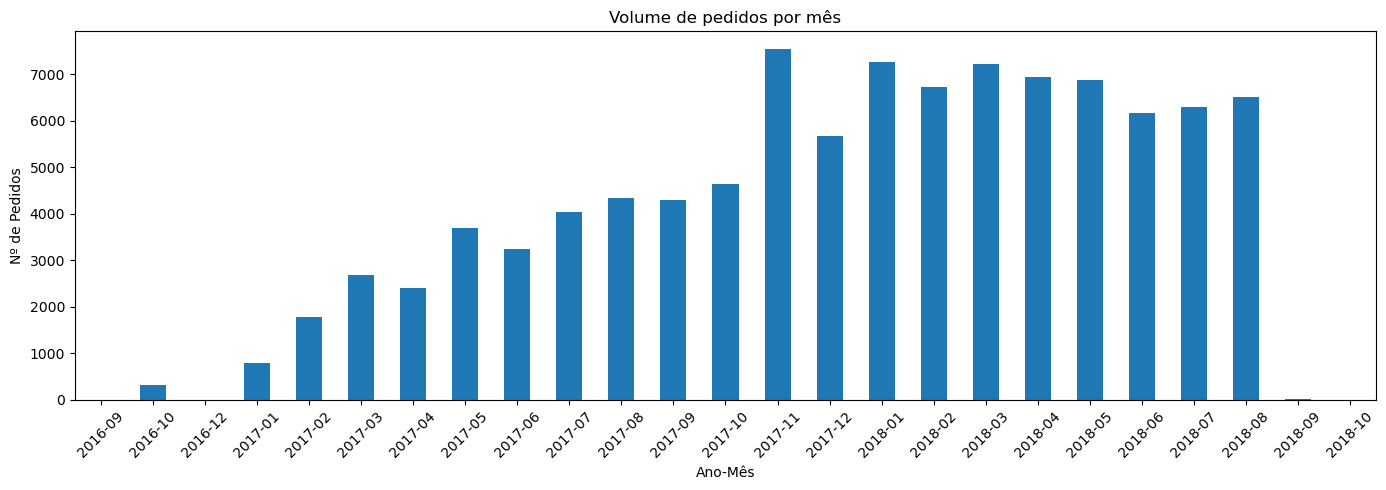

In [12]:
# Converter a coluna para datetime
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])

# Agrupar por ano-m√™s
df["ano_mes"] = df["order_purchase_timestamp"].dt.to_period("M")

# Contar pedidos √∫nicos por m√™s
pedidos_por_mes = df.groupby("ano_mes")["order_id"].nunique()

# Plotar gr√°fico
pedidos_por_mes.plot(kind="bar", figsize=(14,5), title="Volume de pedidos por m√™s")
plt.ylabel("N¬∫ de Pedidos")
plt.xlabel("Ano-M√™s")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2. **Distribui√ß√£o do Tempo de Entrega dos Pedidos**

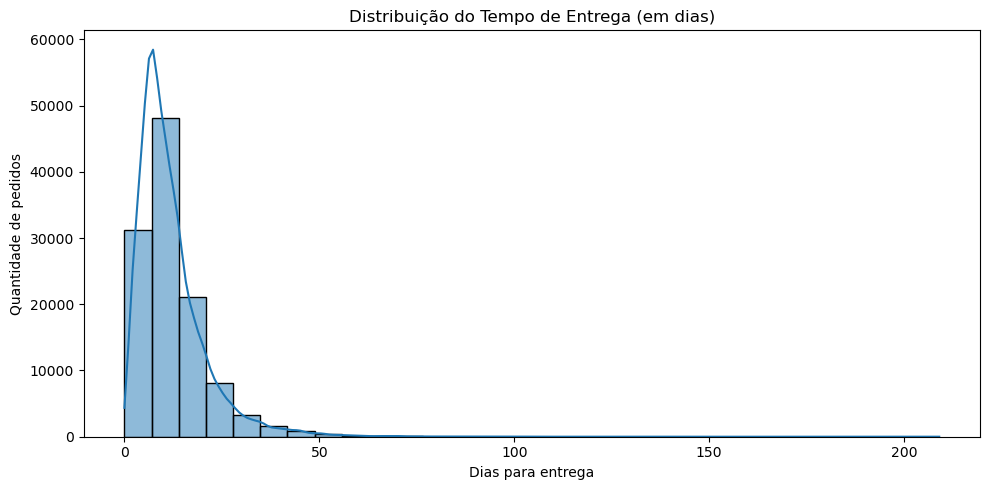

In [14]:
# Converter colunas para datetime (se ainda n√£o estiverem)
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])

# Calcular tempo de entrega (em dias)
df["tempo_entrega"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days

# Remover entregas com tempo negativo (dados inconsistentes)
df = df[df["tempo_entrega"] >= 0]

# Plotar a distribui√ß√£o
plt.figure(figsize=(10,5))
sns.histplot(df["tempo_entrega"], bins=30, kde=True)
plt.title("Distribui√ß√£o do Tempo de Entrega (em dias)")
plt.xlabel("Dias para entrega")
plt.ylabel("Quantidade de pedidos")
plt.tight_layout()
plt.show()

**Distribui√ß√£o do Tempo de Entrega dos Pedidos**

A maioria dos pedidos foi entregue entre **0 e 20 dias**, com um pico entre **8 e 12 dias**, indicando um tempo de entrega padr√£o eficiente para o e-commerce. No entanto, h√° uma cauda longa com entregas que ultrapassam os **50 dias**, sugerindo a exist√™ncia de casos excepcionais ou poss√≠veis atrasos log√≠sticos. Esses outliers devem ser investigados separadamente.

In [17]:
from math import radians, cos, sin, sqrt, atan2

# Fun√ß√£o para calcular a dist√¢ncia entre dois pontos geogr√°ficos
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Raio da Terra em km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

# 1. Criar posi√ß√£o m√©dia por prefixo de CEP
geo_clientes = geoloc.groupby("geolocation_zip_code_prefix")[["geolocation_lat", "geolocation_lng"]].mean().reset_index()
geo_vendedores = geo_clientes.copy()

# 2. Renomear colunas
geo_clientes.columns = ["customer_zip_code_prefix", "customer_lat", "customer_lng"]
geo_vendedores.columns = ["seller_zip_code_prefix", "seller_lat", "seller_lng"]

# 3. Adicionar seller_zip_code_prefix ao df (se n√£o estiver ainda)
df = df.merge(vendedores[["seller_id", "seller_zip_code_prefix"]], on="seller_id", how="left")

# 4. Merge das coordenadas com o df
df_geo = df.merge(geo_clientes, on="customer_zip_code_prefix", how="left")
df_geo = df_geo.merge(geo_vendedores, on="seller_zip_code_prefix", how="left")

# 5. Calcular a dist√¢ncia entre vendedor e cliente
df_geo["distancia_km"] = df_geo.apply(lambda row: 
    haversine(row["customer_lat"], row["customer_lng"], row["seller_lat"], row["seller_lng"]), axis=1)

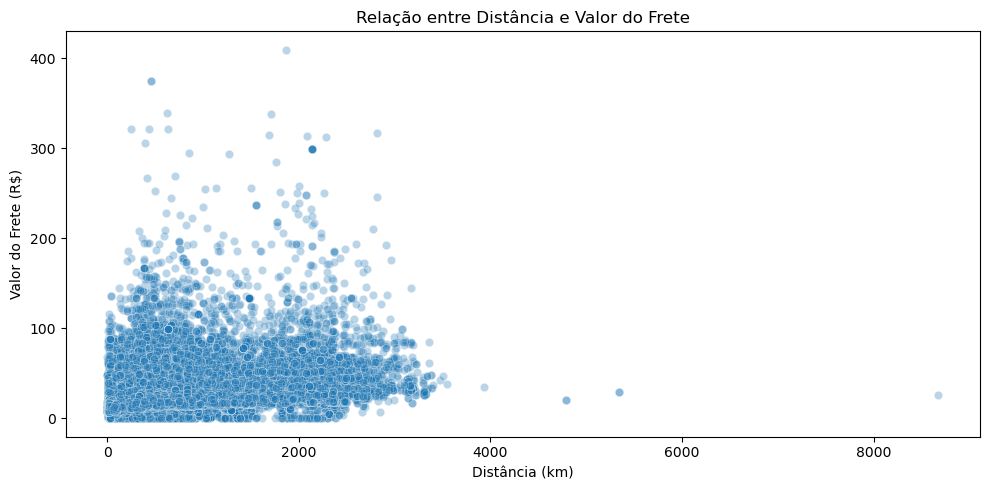

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_geo, x="distancia_km", y="freight_value", alpha=0.3)
plt.title("Rela√ß√£o entre Dist√¢ncia e Valor do Frete")
plt.xlabel("Dist√¢ncia (km)")
plt.ylabel("Valor do Frete (R$)")
plt.tight_layout()
plt.show()

**Rela√ß√£o entre Valor do Frete e Dist√¢ncia**

Observa-se uma tend√™ncia geral de aumento no valor do frete conforme a dist√¢ncia entre cliente e vendedor cresce, o que √© esperado. No entanto, a rela√ß√£o n√£o √© linear: h√° grande dispers√£o de valores e muitos pedidos com frete baixo, mesmo em longas dist√¢ncias.

Isso sugere que fatores como tipo de produto, pol√≠tica de frete gr√°tis, promo√ß√µes, ou contratos log√≠sticos com transportadoras influenciam fortemente o custo final, al√©m da dist√¢ncia geogr√°fica.

Outliers com fretes elevados tamb√©m indicam casos que merecem aten√ß√£o, como entregas urgentes, pesadas ou de regi√µes remotas.

C:\Users\rafae\AppData\Local\Temp\ipykernel_20256\17497802.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faturamento_categorias.values, y=faturamento_categorias.index, palette="viridis")


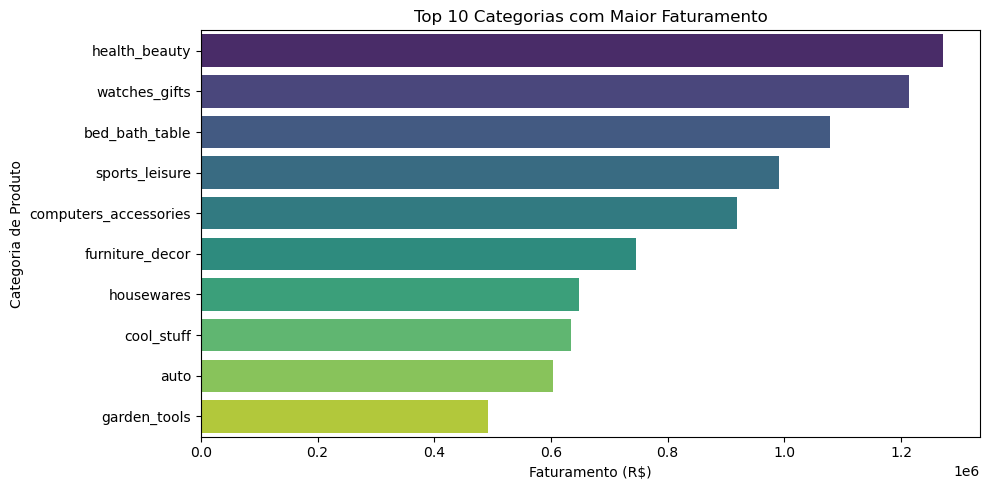

In [20]:
# Agrupar por categoria traduzida e somar o faturamento (price)
faturamento_categorias = df.groupby("product_category_name_english")["price"].sum().sort_values(ascending=False).head(10)

# Plotar gr√°fico
plt.figure(figsize=(10,5))
sns.barplot(x=faturamento_categorias.values, y=faturamento_categorias.index, palette="viridis")
plt.title("Top 10 Categorias com Maior Faturamento")
plt.xlabel("Faturamento (R$)")
plt.ylabel("Categoria de Produto")
plt.tight_layout()
plt.show()

**Top 10 Categorias com Maior Faturamento**

As categorias que mais geraram receita no per√≠odo analisado foram `health_beauty`, `watches_gifts` e `bed_bath_table`. Essas categorias se destacam n√£o necessariamente pela quantidade de pedidos, mas pelo alto valor m√©dio dos produtos.

A presen√ßa de categorias como `computers_accessories` e `furniture_decor` tamb√©m indica uma forte demanda por produtos de maior valor agregado, o que pode exigir estrat√©gias diferenciadas de log√≠stica e atendimento ao cliente.

Esse ranking √© √∫til para direcionar a√ß√µes de marketing, planejamento de estoque e campanhas promocionais com foco nos itens mais lucrativos.

C:\Users\rafae\AppData\Local\Temp\ipykernel_20256\3853113265.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_estado.index, y=media_estado.values, palette="coolwarm")


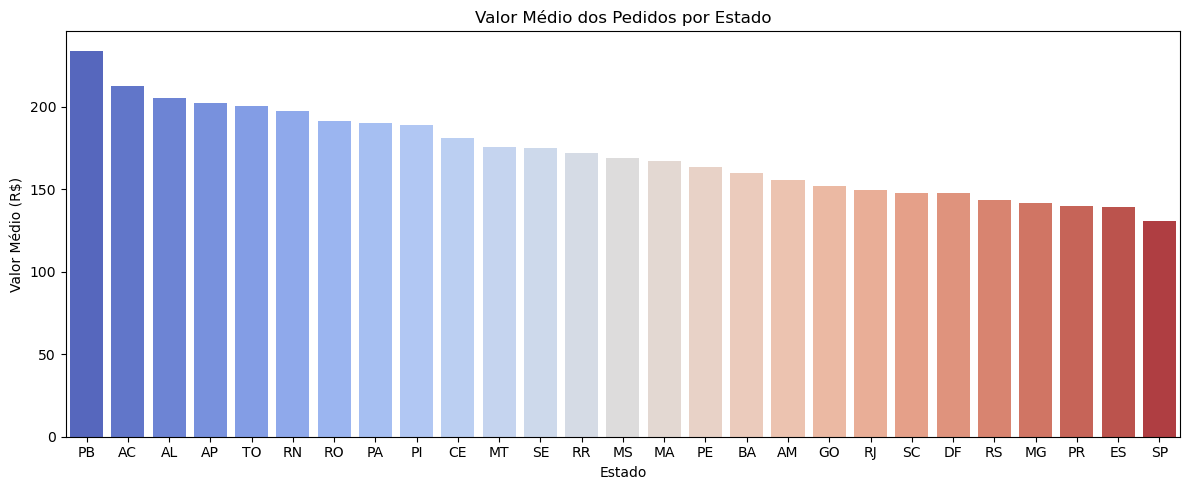

In [23]:
# 1. Calcular o valor total por pedido
valor_por_pedido = df.groupby("order_id")["price"].sum().reset_index()

# 2. Unir com estado do cliente
pedido_estado = df[["order_id", "customer_state"]].drop_duplicates()
valor_estado = pedido_estado.merge(valor_por_pedido, on="order_id", how="left")

# 3. Calcular valor m√©dio por estado
media_estado = valor_estado.groupby("customer_state")["price"].mean().sort_values(ascending=False)

# 4. Plotar gr√°fico
plt.figure(figsize=(12,5))
sns.barplot(x=media_estado.index, y=media_estado.values, palette="coolwarm")
plt.title("Valor M√©dio dos Pedidos por Estado")
plt.xlabel("Estado")
plt.ylabel("Valor M√©dio (R$)")
plt.tight_layout()
plt.show()

**Valor M√©dio dos Pedidos por Estado**

A an√°lise revela que os estados com maior valor m√©dio por pedido s√£o **PB (Para√≠ba), AC (Acre) e AL (Alagoas)**. Isso pode estar relacionado a fatores como custo de log√≠stica, oferta de produtos mais caros ou menor n√∫mero de pedidos com ticket m√©dio elevado.

Curiosamente, **SP (S√£o Paulo)** ‚Äî que possui o maior volume total de pedidos ‚Äî aparece entre os estados com **menor valor m√©dio por pedido**, indicando compras mais recorrentes com valores menores.

Essa informa√ß√£o pode ajudar a empresa a definir estrat√©gias de precifica√ß√£o, frete e marketing regionalizado para maximizar a receita por pedido.

In [26]:
# 1. Contar pedidos por cliente
pedidos_por_cliente = df.groupby("customer_unique_id")["order_id"].nunique()

# 2. Identificar clientes recorrentes
clientes_recorrentes = pedidos_por_cliente[pedidos_por_cliente > 1]
qtd_recorrentes = len(clientes_recorrentes)
qtd_total_clientes = pedidos_por_cliente.shape[0]
taxa_retencao = (qtd_recorrentes / qtd_total_clientes) * 100

# 3. Exibir resultado
print(f"Clientes recorrentes: {qtd_recorrentes}")
print(f"Total de clientes √∫nicos: {qtd_total_clientes}")
print(f"Taxa de reten√ß√£o: {taxa_retencao:.2f}%")

Clientes recorrentes: 2801
Total de clientes √∫nicos: 93356
Taxa de reten√ß√£o: 3.00%


**An√°lise de Reten√ß√£o de Clientes**

Apenas 3% dos clientes realizaram mais de uma compra durante o per√≠odo analisado, indicando uma **baixa taxa de reten√ß√£o**. Isso sugere que a maior parte dos consumidores faz apenas uma compra e n√£o retorna, o que √© comum em muitos e-commerces.

Para melhorar esse indicador, a empresa pode investir em estrat√©gias de fideliza√ß√£o como:
- programas de pontos ou cashback,
- campanhas de e-mail marketing segmentadas,
- cupons de desconto para segunda compra,
- experi√™ncia p√≥s-venda eficiente.

Clientes recorrentes costumam gerar maior valor ao longo do tempo com menor custo de aquisi√ß√£o.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. Criar vari√°vel alvo "atrasado"
df["order_estimated_delivery_date"] = pd.to_datetime(df["order_estimated_delivery_date"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])

df["atrasado"] = (df["order_delivered_customer_date"] > df["order_estimated_delivery_date"]).astype(int)

# Remover nulos nas colunas essenciais
df_modelo = df[["freight_value", "price", "product_weight_g", "product_category_name_english", "atrasado"]].dropna()

# 2. One-hot encode da categoria (para transformar texto em n√∫mero)
df_modelo = pd.get_dummies(df_modelo, columns=["product_category_name_english"], drop_first=True)

# 3. Separar X e y
X = df_modelo.drop("atrasado", axis=1)
y = df_modelo["atrasado"]

# 4. Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Treinar modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# 6. Avaliar
y_pred = modelo.predict(X_test)

print("Matriz de Confus√£o:\n", confusion_matrix(y_test, y_pred))
print("\nRelat√≥rio de Classifica√ß√£o:\n", classification_report(y_test, y_pred))

Matriz de Confus√£o:
 [[30825   524]
 [ 2233   434]]

Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96     31349
           1       0.45      0.16      0.24      2667

    accuracy                           0.92     34016
   macro avg       0.69      0.57      0.60     34016
weighted avg       0.89      0.92      0.90     34016



**Predi√ß√£o de Atraso na Entrega**

Foi desenvolvido um modelo de classifica√ß√£o utilizando Random Forest para prever se um pedido ser√° entregue com atraso. A vari√°vel alvo foi definida com base na compara√ß√£o entre a data de entrega real e a data estimada.

üìå **Resultados:**
- **Acur√°cia geral:** 92%
- **Recall para atrasos:** 16%
- **Precis√£o para atrasos:** 45%

Apesar da alta acur√°cia geral, o modelo tem dificuldade em identificar corretamente os pedidos atrasados (classe minorit√°ria). Isso √© comum em problemas **desbalanceados**, onde a maioria dos pedidos n√£o apresenta atraso.

üìå **Pr√≥ximos passos poss√≠veis:**
- Balanceamento da base (undersampling, SMOTE)
- Adi√ß√£o de novas vari√°veis preditoras (ex: dist√¢ncia, tipo de frete)
- Testes com outros algoritmos (XGBoost, LightGBM)

Mesmo com limita√ß√µes, o modelo j√° serve como ponto de partida para monitoramento e previs√£o de riscos log√≠sticos.


C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

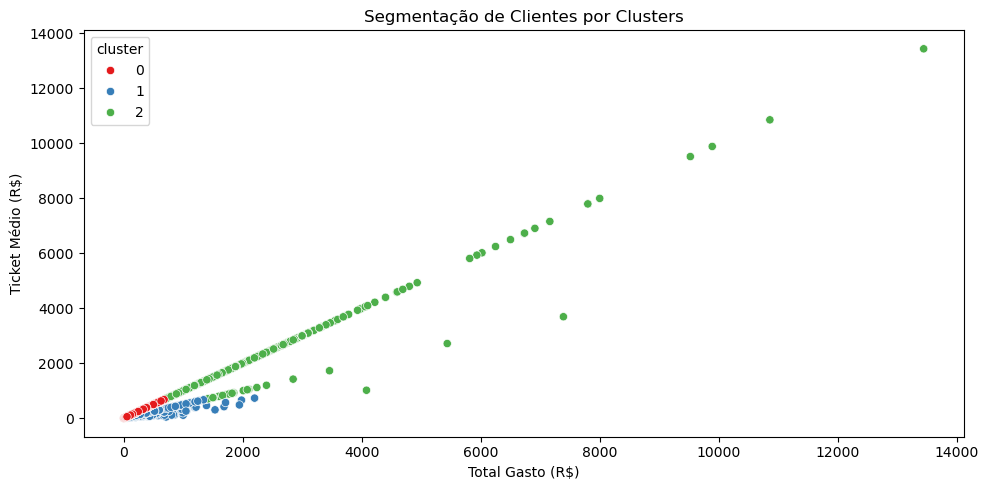

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Criar base por cliente
clientes_df = df.groupby("customer_unique_id").agg({
    "order_id": "nunique",
    "price": "sum"
}).rename(columns={
    "order_id": "qtde_pedidos",
    "price": "total_gasto"
}).reset_index()

clientes_df["ticket_medio"] = clientes_df["total_gasto"] / clientes_df["qtde_pedidos"]

# 2. Padronizar os dados
features = ["qtde_pedidos", "total_gasto", "ticket_medio"]
scaler = StandardScaler()
clientes_scaled = scaler.fit_transform(clientes_df[features])

# 3. KMeans com 3 clusters (exemplo)
kmeans = KMeans(n_clusters=3, random_state=42)
clientes_df["cluster"] = kmeans.fit_predict(clientes_scaled)

# 4. Visualizar clusters
plt.figure(figsize=(10,5))
sns.scatterplot(data=clientes_df, x="total_gasto", y="ticket_medio", hue="cluster", palette="Set1")
plt.title("Segmenta√ß√£o de Clientes por Clusters")
plt.xlabel("Total Gasto (R$)")
plt.ylabel("Ticket M√©dio (R$)")
plt.tight_layout()
plt.show()

**Segmenta√ß√£o de Clientes com Clustering (KMeans)**

Foi aplicado o algoritmo KMeans com 3 clusters para agrupar os clientes com base em:

- Quantidade de pedidos
- Total gasto
- Ticket m√©dio por pedido

üìå **Perfis encontrados:**
- **Cluster 0 (vermelho):** clientes com baixo gasto e ticket m√©dio ‚Äî perfil de consumo pontual
- **Cluster 1 (azul):** clientes com gasto intermedi√°rio, fazem mais pedidos ‚Äî perfil potencialmente fiel
- **Cluster 2 (verde):** clientes com alto ticket m√©dio e alto gasto total ‚Äî alto valor estrat√©gico para o neg√≥cio

Essa segmenta√ß√£o ajuda a empresa a definir estrat√©gias personalizadas:
- **Cluster 0:** foco em aquisi√ß√£o e engajamento
- **Cluster 1:** campanhas de reten√ß√£o
- **Cluster 2:** atendimento premium e fideliza√ß√£o

Pr√≥ximos passos podem incluir a expans√£o do n√∫mero de clusters, cruzamento com dados de avalia√ß√£o ou uso de t√©cnicas como DBSCAN ou PCA.


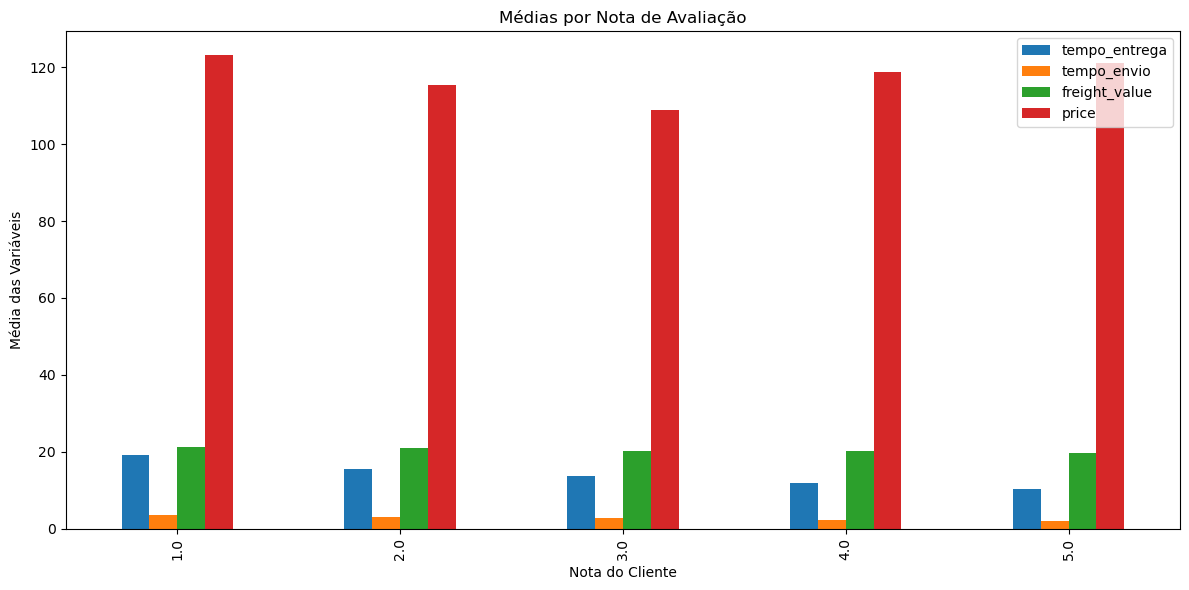

In [32]:
# 1. Unir avalia√ß√µes ao DataFrame
df_avaliacoes = df.merge(reviews[["order_id", "review_score"]], on="order_id", how="left")

# 2. Converter colunas de data para datetime
df_avaliacoes["order_purchase_timestamp"] = pd.to_datetime(df_avaliacoes["order_purchase_timestamp"])
df_avaliacoes["order_delivered_customer_date"] = pd.to_datetime(df_avaliacoes["order_delivered_customer_date"])
df_avaliacoes["order_delivered_carrier_date"] = pd.to_datetime(df_avaliacoes["order_delivered_carrier_date"])
df_avaliacoes["order_approved_at"] = pd.to_datetime(df_avaliacoes["order_approved_at"])

# 3. Criar vari√°veis de tempo
df_avaliacoes["tempo_entrega"] = (df_avaliacoes["order_delivered_customer_date"] - df_avaliacoes["order_purchase_timestamp"]).dt.days
df_avaliacoes["tempo_envio"] = (df_avaliacoes["order_delivered_carrier_date"] - df_avaliacoes["order_approved_at"]).dt.days

# 4. Remover linhas com dados ausentes
df_avaliacoes = df_avaliacoes.dropna(subset=["review_score", "tempo_entrega", "tempo_envio"])

# 5. Agrupar por nota e calcular m√©dias
df_media = df_avaliacoes.groupby("review_score")[["tempo_entrega", "tempo_envio", "freight_value", "price"]].mean().reset_index()

# 6. Plotar gr√°fico comparativo
df_media.set_index("review_score").plot(kind="bar", figsize=(12,6))
plt.title("M√©dias por Nota de Avalia√ß√£o")
plt.ylabel("M√©dia das Vari√°veis")
plt.xlabel("Nota do Cliente")
plt.tight_layout()
plt.show()

**Fatores que Influenciam a Nota de Avalia√ß√£o do Cliente**

A an√°lise indica uma rela√ß√£o inversa entre o tempo de entrega e a nota de avalia√ß√£o:

- üìâ **Quanto maior o tempo de entrega, menor a nota m√©dia dada pelo cliente.**
- O tempo de envio tamb√©m tende a ser maior nas notas mais baixas, embora com menos impacto do que o tempo total de entrega.
- As vari√°veis `freight_value` (valor do frete) e `price` (pre√ßo do pedido) apresentaram **pouca varia√ß√£o** entre as notas ‚Äî ou seja, **n√£o parecem ser determinantes para a insatisfa√ß√£o**.

üìå **Conclus√£o**:  
O **tempo de entrega** √© o fator com maior correla√ß√£o com a nota de avalia√ß√£o. Isso sugere que atrasos log√≠sticos t√™m forte impacto negativo na experi√™ncia do cliente.

üìå **Recomenda√ß√µes**:
- Monitorar e reduzir o tempo entre a compra e a entrega.
- Notificar o cliente proativamente em caso de atraso.
- Priorizar melhorias log√≠sticas para categorias ou regi√µes com maior taxa de atraso.

Essa an√°lise ajuda a direcionar melhorias operacionais com foco em satisfa√ß√£o e fideliza√ß√£o do cliente.
